Data loaded successfully.
Shape before cleaning: (30, 11)
Shape after cleaning: (30, 11)


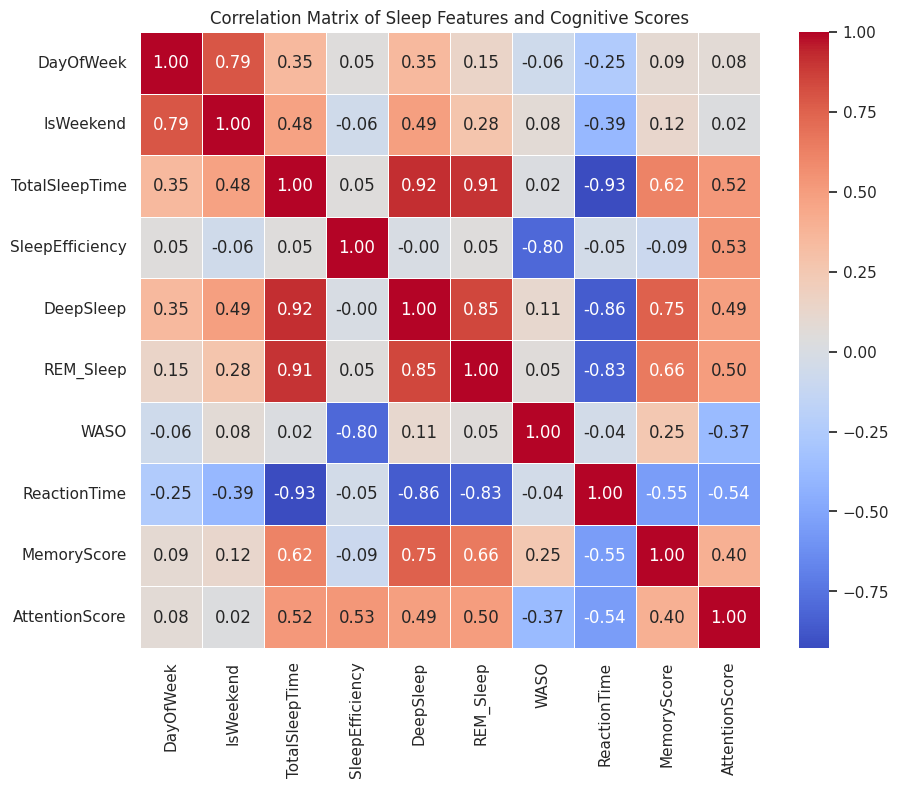


>>> INTERPRETATION: Correlation Matrix (Heatmap)
1. How to read: Dark red indicates a strong positive correlation (variables move together).
   Dark blue indicates a strong negative correlation (variables move in opposite directions).
2. Key Insight to look for: Check the intersection of 'SleepDuration/Efficiency' and 'ReactionTime'.
   - Expectation: Negative correlation (Blue). Higher sleep usually lowers reaction time (improves speed).
3. Check 'DeepSleep' vs 'MemoryScore': Expectation is Positive (Red).


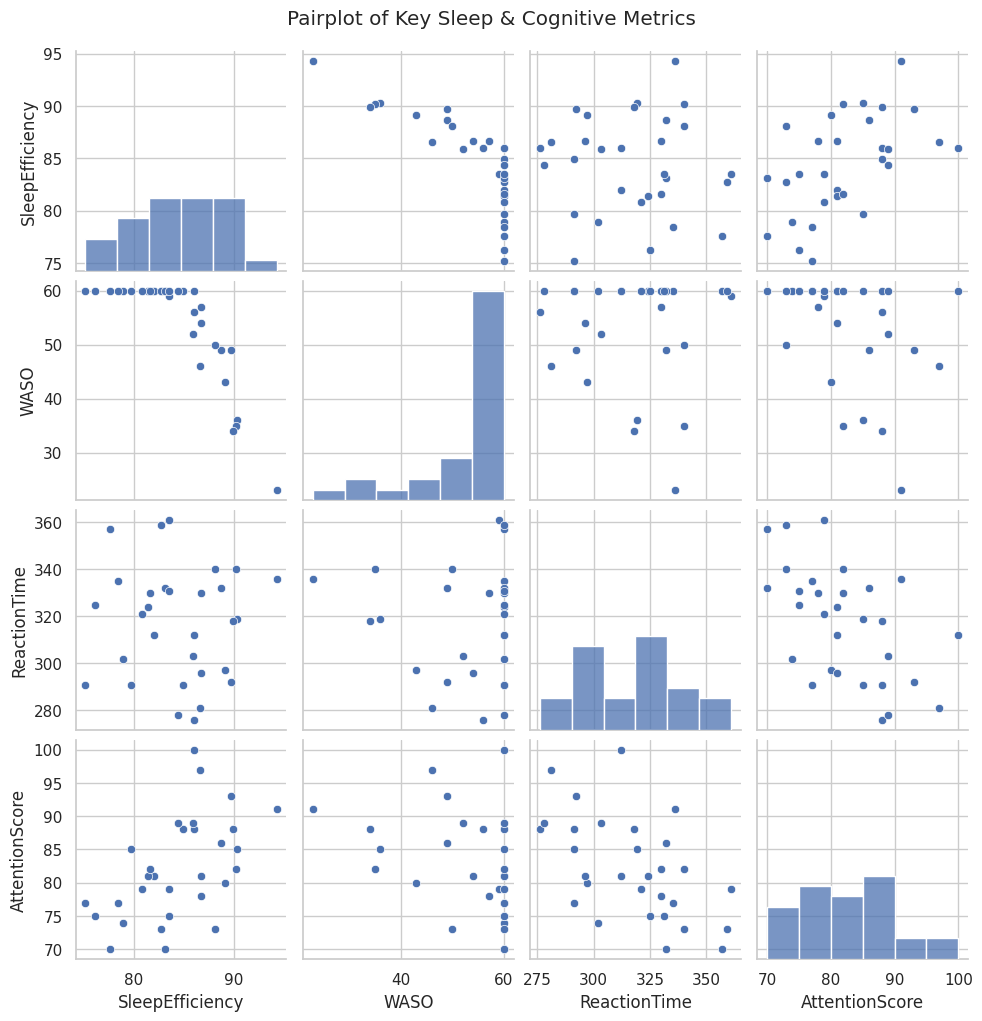


>>> INTERPRETATION: Pairplot
1. Diagonals: Show the distribution of a single variable. Bell shapes (Normal Distribution) are ideal for regression.
2. Scatter Plots: Look for patterns in the scatter grids.
   - If points form a line sloping UP: Positive relationship.
   - If points form a line sloping DOWN: Negative relationship.
   - If points are a random cloud: No linear relationship exists.


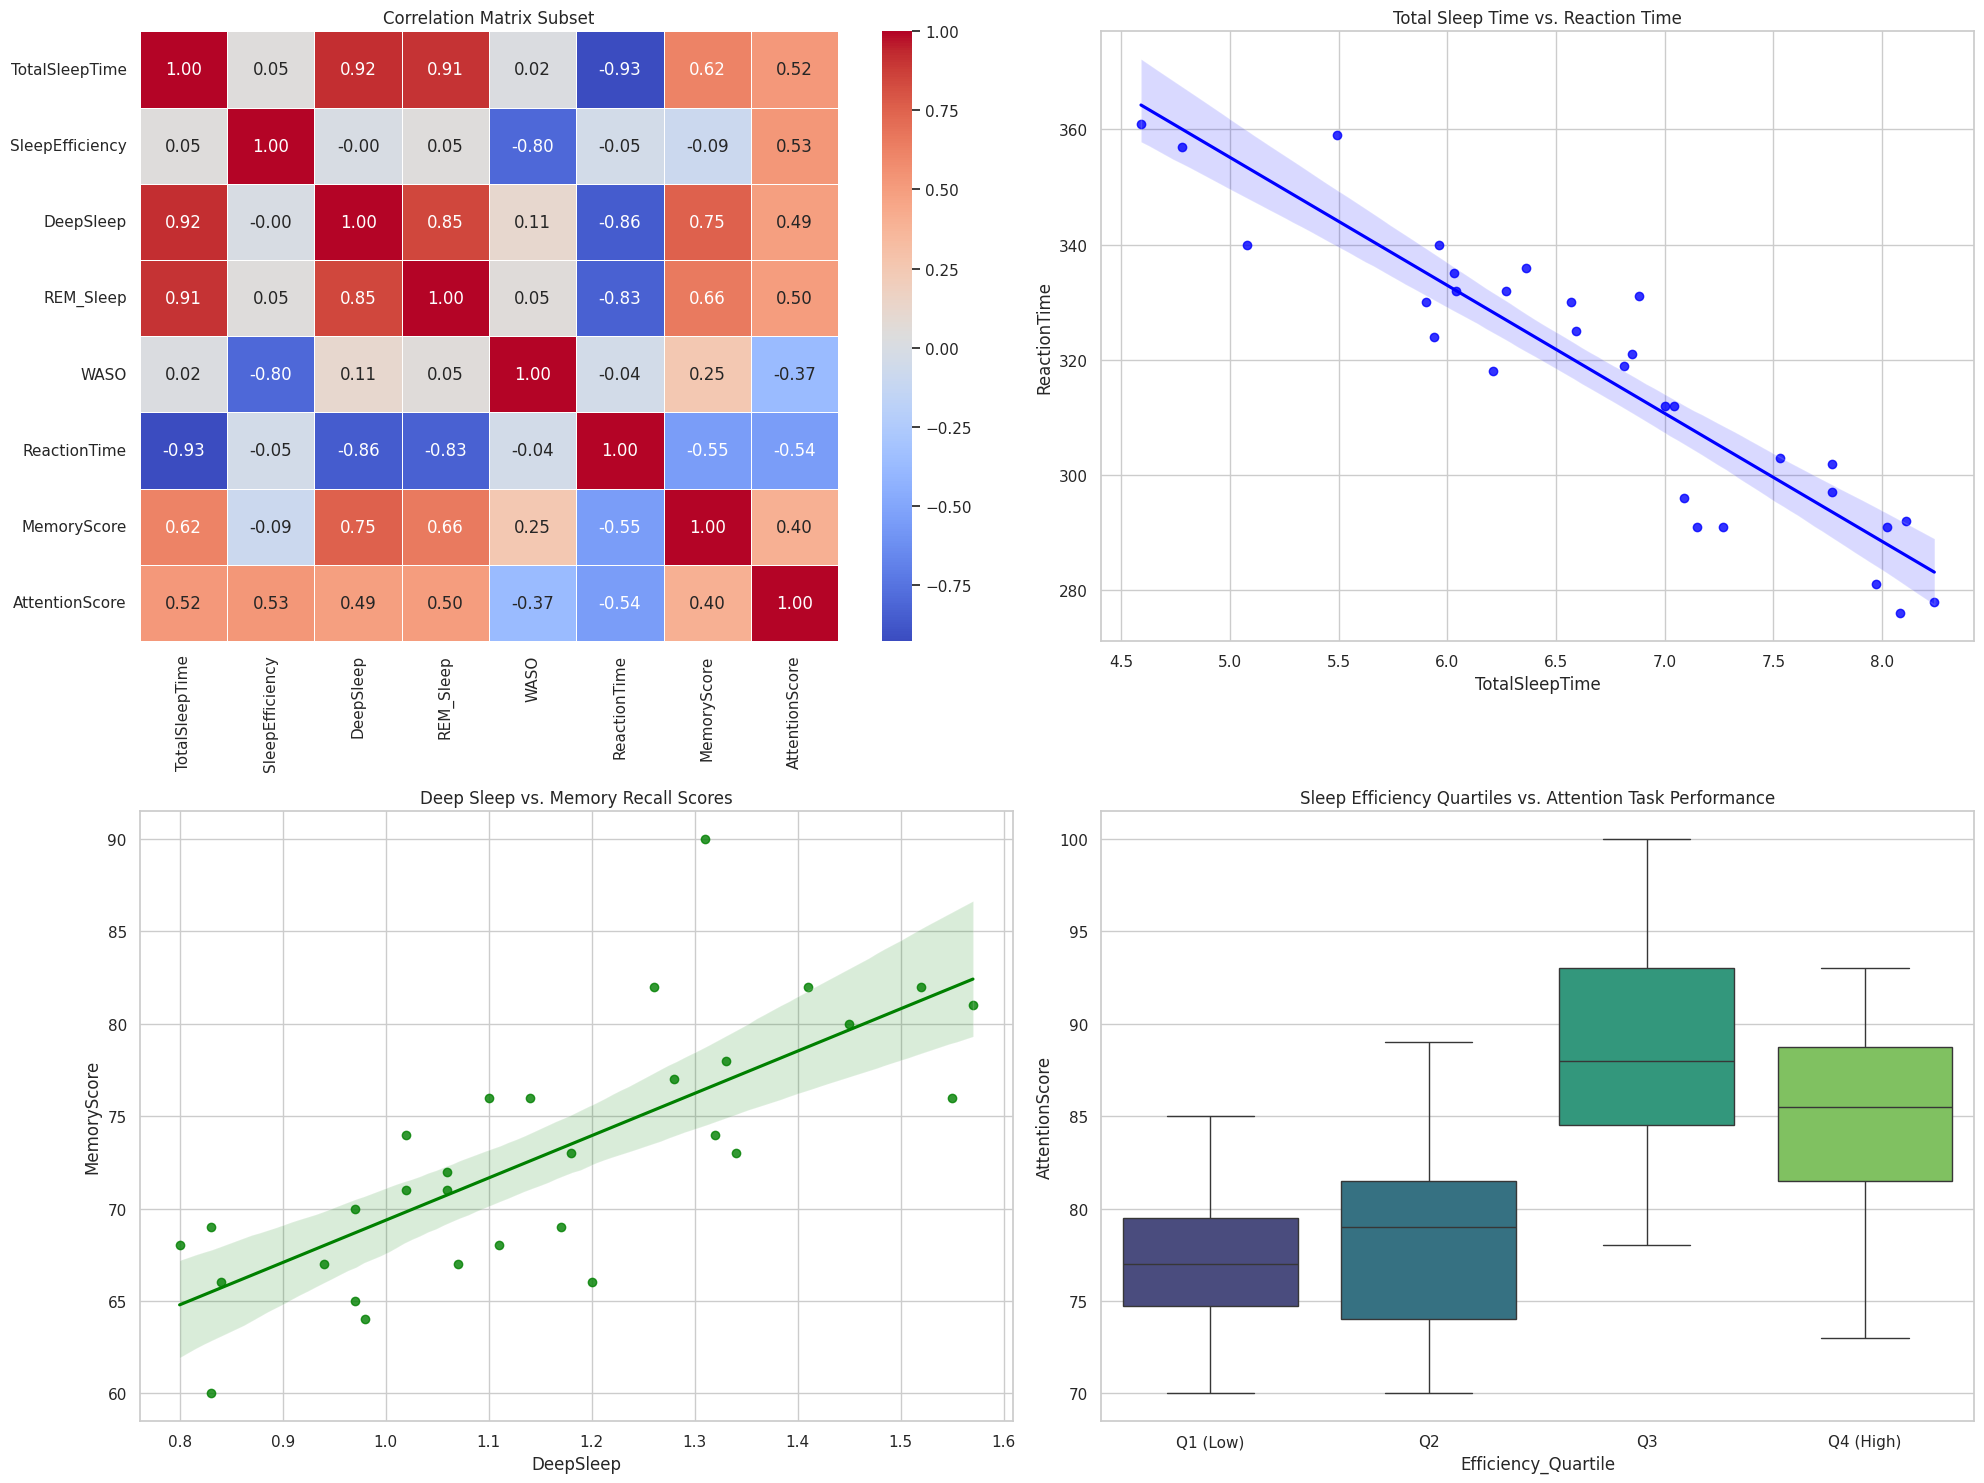


>>> INTERPRETATION: Composite Dashboard
1. Plot B (Top Right): Look at the trend line.
   - A steep downward slope confirms that more sleep reduces reaction time.
   - The shaded area around the line represents the confidence interval (uncertainty).
2. Plot D (Bottom Right): Compare the medians (line inside the box).
   - If Q4 (High Efficiency) has a higher median Attention Score than Q1, efficient sleep improves focus.

HYPOTHESIS TESTING RESULTS

1. Hypothesis: Total Sleep Time vs. Reaction Time
   Pearson Correlation (r): -0.928
   P-value: 0.00000
   >>> CONCLUSION: Statistically Significant. We reject the null hypothesis.
       There is a verified link between sleep duration and reaction speed.

2. Hypothesis: Deep Sleep vs. Memory Recall
   Pearson Correlation (r): 0.754
   P-value: 0.00000
   >>> CONCLUSION: Statistically Significant. Deep sleep positively impacts memory.

STARTING ML ANALYSIS

Training Models...
   Linear Regression R2 Score: -0.6408
   Random Forest R2 Scor

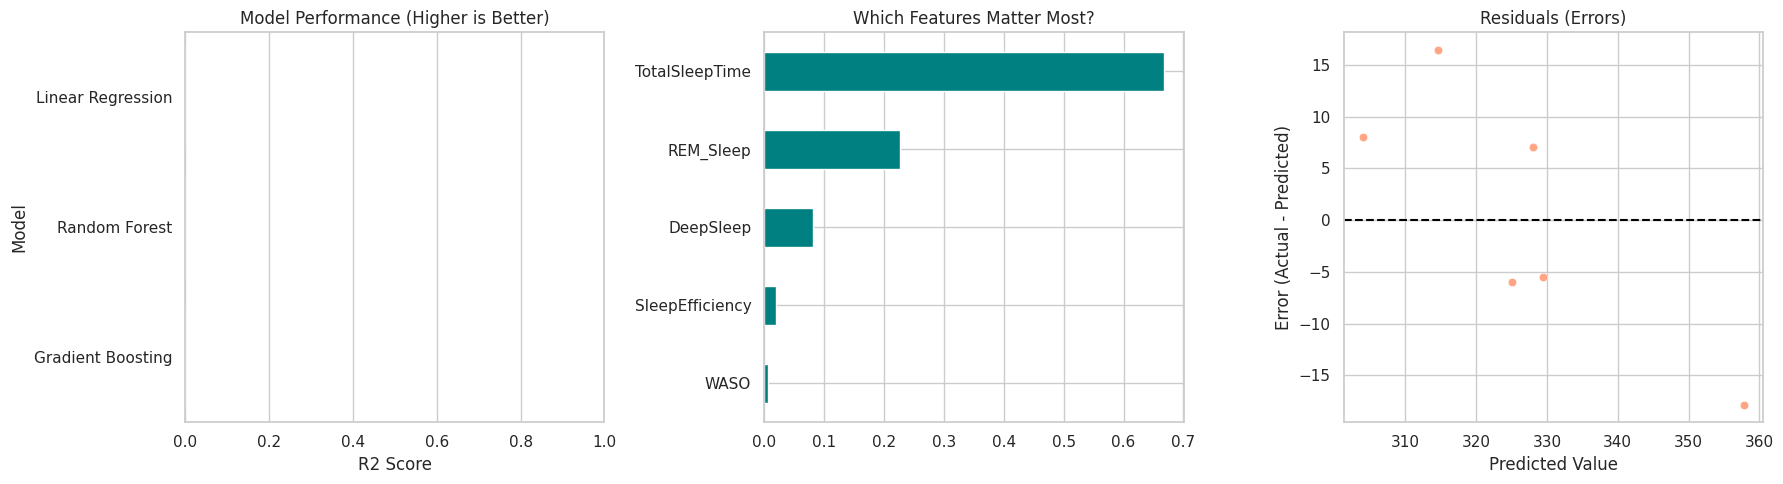


>>> INTERPRETATION: Machine Learning Results
1. Best Model Performance: R2 Score = -0.40
   - Evaluation: The model performance is low. We might need more data or better features.

2. Feature Importance (Middle Graph):
   - The most influential factor in predicting Reaction Time is: 'TotalSleepTime'
   - This suggests that optimizing this specific sleep metric yields the biggest cognitive gain.

3. Residual Plot (Right Graph):
   - Ideally, points should be randomly scattered around the black dashed line.
   - If points form a shape (like a U-curve or funnel), the model is missing a non-linear pattern.


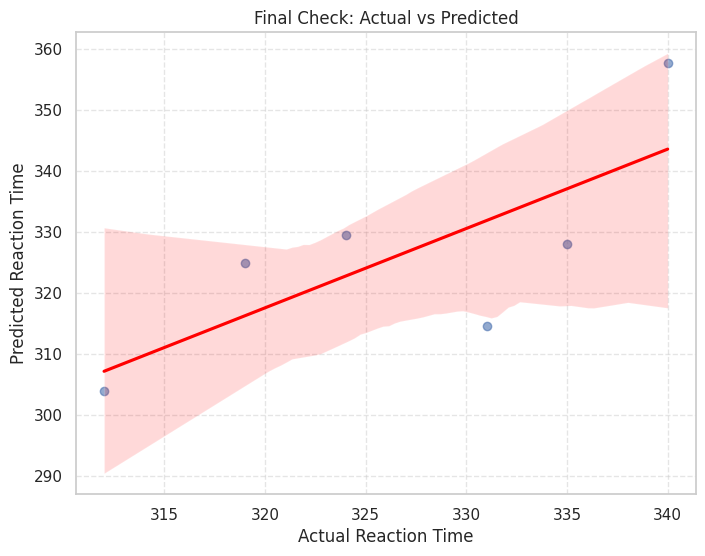

>>> Final Check Plot:
   - The closer the blue dots are to the red line, the better the prediction.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------------------
# 1. DATA COLLECTION AND PROCESSING
# ---------------------------------------------------------

file_path = 'DSA210_ProjectData.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: File '{file_path}' not found. Please check the file name.")
    exit()

# Standardize the Date format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Data Cleaning
print(f"Shape before cleaning: {df.shape}")
df.dropna(inplace=True)
print(f"Shape after cleaning: {df.shape}")

# ---------------------------------------------------------
# 2. DATA VISUALIZATION & INSIGHTS
# ---------------------------------------------------------

# --- Visualization 1: Correlation Matrix (Heatmap) ---
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sleep Features and Cognitive Scores")
plt.show()

# [INTERPRETATION LOGIC 1]
print("\n" + "="*60)
print(">>> INTERPRETATION: Correlation Matrix (Heatmap)")
print("="*60)
print("1. How to read: Dark red indicates a strong positive correlation (variables move together).")
print("   Dark blue indicates a strong negative correlation (variables move in opposite directions).")
print("2. Key Insight to look for: Check the intersection of 'SleepDuration/Efficiency' and 'ReactionTime'.")
print("   - Expectation: Negative correlation (Blue). Higher sleep usually lowers reaction time (improves speed).")
print("3. Check 'DeepSleep' vs 'MemoryScore': Expectation is Positive (Red).")

# --- Visualization 2: Pairplot ---
selected_features = ['SleepDuration', 'SleepEfficiency', 'WASO', 'ReactionTime', 'AttentionScore']
existing_features = [col for col in selected_features if col in df.columns]

if existing_features:
    sns.pairplot(df[existing_features])
    plt.suptitle("Pairplot of Key Sleep & Cognitive Metrics", y=1.02)
    plt.show()

    # [INTERPRETATION LOGIC 2]
    print("\n" + "="*60)
    print(">>> INTERPRETATION: Pairplot")
    print("="*60)
    print("1. Diagonals: Show the distribution of a single variable. Bell shapes (Normal Distribution) are ideal for regression.")
    print("2. Scatter Plots: Look for patterns in the scatter grids.")
    print("   - If points form a line sloping UP: Positive relationship.")
    print("   - If points form a line sloping DOWN: Negative relationship.")
    print("   - If points are a random cloud: No linear relationship exists.")

# --- Visualization 3: Composite Dashboard (4 Subplots) ---
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# Define numeric cols specifically for this plot to avoid errors
numeric_cols = ['TotalSleepTime', 'SleepEfficiency', 'DeepSleep', 'REM_Sleep',
                'WASO', 'ReactionTime', 'MemoryScore', 'AttentionScore']
# Filter existing columns only
available_cols = [c for c in numeric_cols if c in df.columns]

# A. Heatmap
plt.subplot(2, 2, 1)
if available_cols:
    corr_matrix_sub = df[available_cols].corr()
    sns.heatmap(corr_matrix_sub, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Subset')

# B. Regression Plot 1
plt.subplot(2, 2, 2)
if 'TotalSleepTime' in df.columns and 'ReactionTime' in df.columns:
    sns.regplot(x='TotalSleepTime', y='ReactionTime', data=df, color='blue', marker='o')
plt.title('Total Sleep Time vs. Reaction Time')

# C. Regression Plot 2
plt.subplot(2, 2, 3)
if 'DeepSleep' in df.columns and 'MemoryScore' in df.columns:
    sns.regplot(x='DeepSleep', y='MemoryScore', data=df, color='green', marker='o')
plt.title('Deep Sleep vs. Memory Recall Scores')

# D. Boxplots
plt.subplot(2, 2, 4)
if 'SleepEfficiency' in df.columns and 'AttentionScore' in df.columns:
    df['Efficiency_Quartile'] = pd.qcut(df['SleepEfficiency'], q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])
    sns.boxplot(x='Efficiency_Quartile', y='AttentionScore', data=df, hue='Efficiency_Quartile', palette="viridis", legend=False)
plt.title('Sleep Efficiency Quartiles vs. Attention Task Performance')

plt.tight_layout()
plt.show()

# [INTERPRETATION LOGIC 3]
print("\n" + "="*60)
print(">>> INTERPRETATION: Composite Dashboard")
print("="*60)
print("1. Plot B (Top Right): Look at the trend line.")
print("   - A steep downward slope confirms that more sleep reduces reaction time.")
print("   - The shaded area around the line represents the confidence interval (uncertainty).")
print("2. Plot D (Bottom Right): Compare the medians (line inside the box).")
print("   - If Q4 (High Efficiency) has a higher median Attention Score than Q1, efficient sleep improves focus.")

# ---------------------------------------------------------
# 3. HYPOTHESIS TESTING
# ---------------------------------------------------------

print("\n" + "="*50)
print("HYPOTHESIS TESTING RESULTS")
print("="*50)

# Test 1
if 'TotalSleepTime' in df.columns and 'ReactionTime' in df.columns:
    r_reaction, p_reaction = stats.pearsonr(df['TotalSleepTime'], df['ReactionTime'])
    print(f"\n1. Hypothesis: Total Sleep Time vs. Reaction Time")
    print(f"   Pearson Correlation (r): {r_reaction:.3f}")
    print(f"   P-value: {p_reaction:.5f}")
    if p_reaction < 0.05:
        print("   >>> CONCLUSION: Statistically Significant. We reject the null hypothesis.")
        print("       There is a verified link between sleep duration and reaction speed.")
    else:
        print("   >>> CONCLUSION: Not Significant. Could not prove a relationship with this data.")

# Test 2
if 'DeepSleep' in df.columns and 'MemoryScore' in df.columns:
    r_memory, p_memory = stats.pearsonr(df['DeepSleep'], df['MemoryScore'])
    print(f"\n2. Hypothesis: Deep Sleep vs. Memory Recall")
    print(f"   Pearson Correlation (r): {r_memory:.3f}")
    print(f"   P-value: {p_memory:.5f}")
    if p_memory < 0.05:
        print("   >>> CONCLUSION: Statistically Significant. Deep sleep positively impacts memory.")

# ---------------------------------------------------------
# 4. MACHINE LEARNING ANALYSIS
# ---------------------------------------------------------

print("\n" + "="*50)
print("STARTING ML ANALYSIS")
print("="*50)

target_col = 'ReactionTime'
feature_candidates = ['SleepDuration', 'TotalSleepTime', 'SleepEfficiency', 'DeepSleep', 'REM', 'REM_Sleep', 'WASO', 'Age', 'CaffeineIntake']
feature_cols = [col for col in feature_candidates if col in df.columns]

if target_col in df.columns and feature_cols:
    X = df[feature_cols]
    y = df[target_col]

    # Scale and Split
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Models
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42)
    }

    results = []
    print("\nTraining Models...")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        results.append({"Model": name, "R2 Score": r2})
        print(f"   {name} R2 Score: {r2:.4f}")

    results_df = pd.DataFrame(results)

    # Grid Search (Simplified)
    rf = RandomForestRegressor(random_state=42)
    param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10]}
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_rf = grid_search.best_estimator_
    y_pred_best = best_rf.predict(X_test)
    r2_best = r2_score(y_test, y_pred_best)

    # --- ML Visualizations ---
    plt.figure(figsize=(18, 5))

    # Plot 1: Model Comparison
    plt.subplot(1, 3, 1)
    sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
    plt.title('Model Performance (Higher is Better)')
    plt.xlim(0, 1)

    # Plot 2: Feature Importance
    plt.subplot(1, 3, 2)
    feature_importances = pd.Series(best_rf.feature_importances_, index=feature_cols)
    feature_importances.sort_values(ascending=True).plot(kind='barh', color='teal')
    plt.title('Which Features Matter Most?')

    # Plot 3: Residuals
    residuals = y_test - y_pred_best
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=y_pred_best, y=residuals, color='coral', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Residuals (Errors)')
    plt.xlabel('Predicted Value')
    plt.ylabel('Error (Actual - Predicted)')

    plt.tight_layout()
    plt.show()

    # [INTERPRETATION LOGIC 4]
    print("\n" + "="*60)
    print(">>> INTERPRETATION: Machine Learning Results")
    print("="*60)

    print(f"1. Best Model Performance: R2 Score = {r2_best:.2f}")
    if r2_best > 0.5:
        print("   - Evaluation: The model explains the variance in Reaction Time reasonably well.")
    else:
        print("   - Evaluation: The model performance is low. We might need more data or better features.")

    print("\n2. Feature Importance (Middle Graph):")
    top_feature = feature_importances.idxmax()
    print(f"   - The most influential factor in predicting Reaction Time is: '{top_feature}'")
    print("   - This suggests that optimizing this specific sleep metric yields the biggest cognitive gain.")

    print("\n3. Residual Plot (Right Graph):")
    print("   - Ideally, points should be randomly scattered around the black dashed line.")
    print("   - If points form a shape (like a U-curve or funnel), the model is missing a non-linear pattern.")

    # Final Actual vs Predicted
    plt.figure(figsize=(8, 6))
    sns.regplot(x=y_test, y=y_pred_best, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.xlabel('Actual Reaction Time')
    plt.ylabel('Predicted Reaction Time')
    plt.title('Final Check: Actual vs Predicted')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    print(">>> Final Check Plot:")
    print("   - The closer the blue dots are to the red line, the better the prediction.")